In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pakai data ini https://www.kaggle.com/datasets/neuromusic/avocado-prices
lakukan semua yang dibawah ini

In [2]:
df = pd.read_csv('vgsales.csv')

In [3]:
cols = ['Rank', 'Year','NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

In [4]:
df_zscore = pd.DataFrame()
for col in cols:
    df_zscore[col] = (df[col] - df[col].mean())/df[col].std(ddof=0)

In [5]:
print(df_zscore)

           Rank      Year   NA_Sales   EU_Sales   JP_Sales  Other_Sales  \
0     -1.732076 -0.069730  50.480508  57.136930  11.938058    44.606085   
1     -1.731867 -3.672528  35.284437   6.794188  21.767296     3.828224   
2     -1.731659  0.273393  19.084273  25.197785  12.002724    17.297115   
3     -1.731450  0.444955  18.961823  21.497277  10.353740    15.441165   
4     -1.731241 -1.785348  13.476053  17.302048  32.792857     5.047848   
...         ...       ...        ...        ...        ...          ...   
16593  1.731197 -0.755977  -0.311841  -0.290207  -0.251492    -0.254864   
16594  1.731406 -0.584416  -0.311841  -0.290207  -0.251492    -0.254864   
16595  1.731615  0.273393  -0.324086  -0.290207  -0.251492    -0.254864   
16596  1.731823  0.616517  -0.324086  -0.270418  -0.251492    -0.254864   
16597  1.732032 -0.584416  -0.311841  -0.290207  -0.251492    -0.254864   

       Global_Sales  
0         52.864025  
1         25.532503  
2         22.690025  
3         2

<AxesSubplot:>

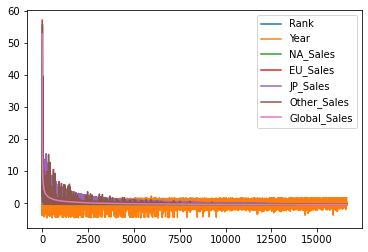

In [6]:
df_zscore.plot()

In [7]:
df_dscale = pd.DataFrame()
for col in cols:
    p = df[col].max()
    q = len(str(abs(p)))
    df_dscale[col] = df[col]/10**q

In [8]:
print(df_dscale)

          Rank      Year      NA_Sales      EU_Sales  JP_Sales  Other_Sales  \
0      0.00001  0.002006  4.149000e-04  2.902000e-04  0.000038     0.000085   
1      0.00002  0.001985  2.908000e-04  3.580000e-05  0.000068     0.000008   
2      0.00003  0.002008  1.585000e-04  1.288000e-04  0.000038     0.000033   
3      0.00004  0.002009  1.575000e-04  1.101000e-04  0.000033     0.000030   
4      0.00005  0.001996  1.127000e-04  8.890000e-05  0.000102     0.000010   
...        ...       ...           ...           ...       ...          ...   
16593  0.16596  0.002002  1.000000e-07  0.000000e+00  0.000000     0.000000   
16594  0.16597  0.002003  1.000000e-07  0.000000e+00  0.000000     0.000000   
16595  0.16598  0.002008  0.000000e+00  0.000000e+00  0.000000     0.000000   
16596  0.16599  0.002010  0.000000e+00  1.000000e-07  0.000000     0.000000   
16597  0.16600  0.002003  1.000000e-07  0.000000e+00  0.000000     0.000000   

       Global_Sales  
0      8.274000e-04  
1      

<AxesSubplot:>

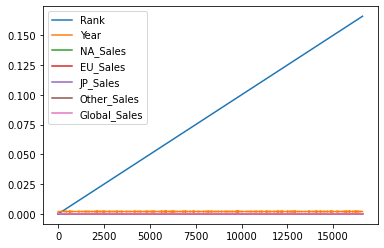

In [9]:
df_dscale.plot()

In [10]:
dups_platform = df.pivot_table(index=['Genre'], aggfunc='size')
print (dups_platform)

Genre
Action          3316
Adventure       1286
Fighting         848
Misc            1739
Platform         886
Puzzle           582
Racing          1249
Role-Playing    1488
Shooter         1310
Simulation       867
Sports          2346
Strategy         681
dtype: int64


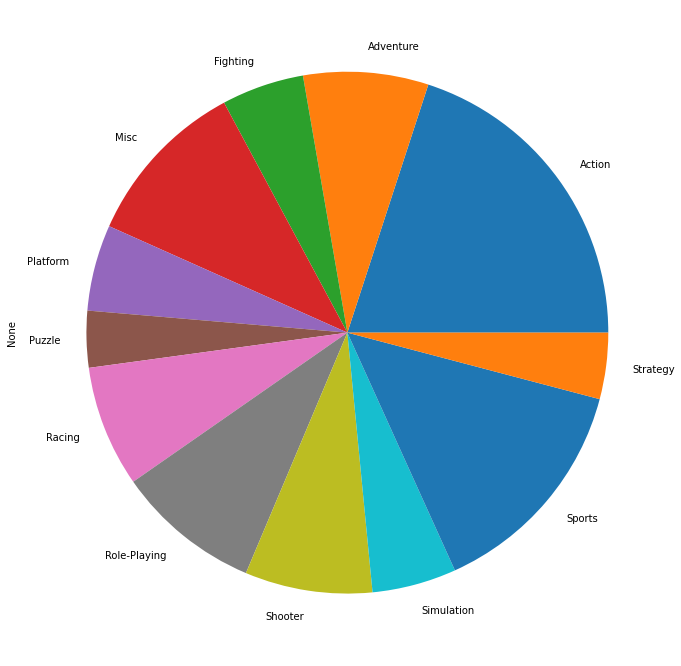

In [11]:
plot = dups_platform.plot.pie(y='Genre', figsize=(12, 12))

In [14]:
dups_platform_genre = df.pivot_table(index=['Platform','Genre'], aggfunc='size')
dups_platform_genre

Platform  Genre       
2600      Action          61
          Adventure        2
          Fighting         2
          Misc             5
          Platform         9
                          ..
XOne      Role-Playing    13
          Shooter         33
          Simulation       3
          Sports          36
          Strategy         3
Length: 293, dtype: int64

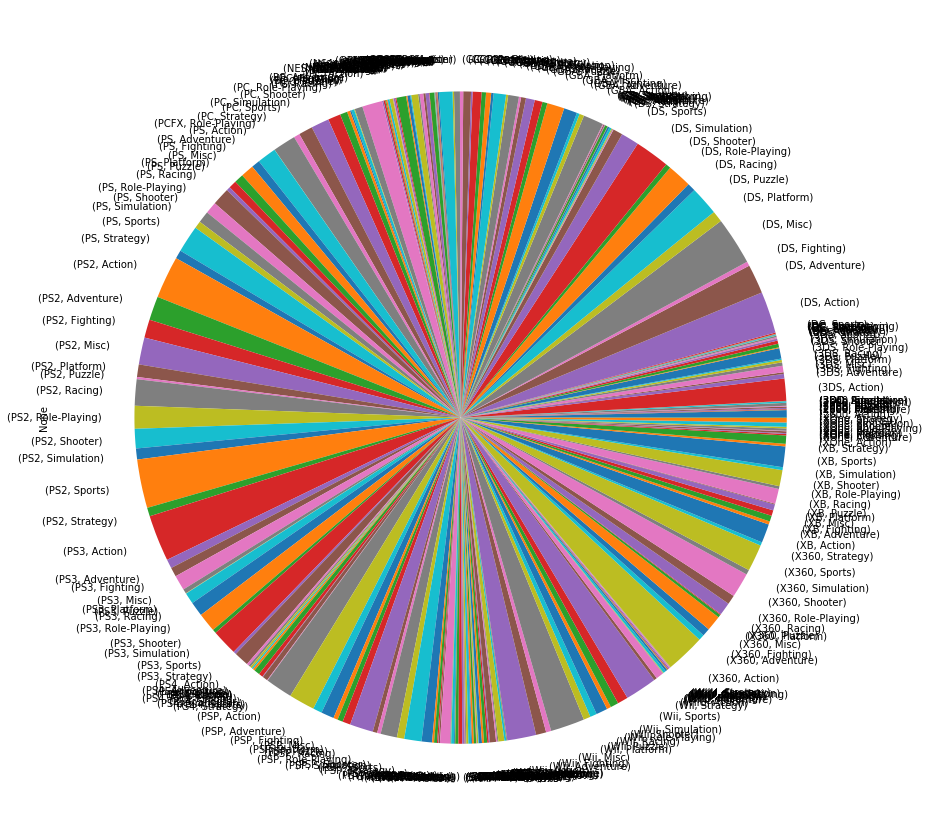

In [16]:
plot = dups_platform_genre.plot.pie(subplots=True, figsize=(15,15))

                  Rank      Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Rank          1.000000  0.178814 -0.401362 -0.379123 -0.267785    -0.332986   
Year          0.178814  1.000000 -0.091402  0.006014 -0.169316     0.041058   
NA_Sales     -0.401362 -0.091402  1.000000  0.767727  0.449787     0.634737   
EU_Sales     -0.379123  0.006014  0.767727  1.000000  0.435584     0.726385   
JP_Sales     -0.267785 -0.169316  0.449787  0.435584  1.000000     0.290186   
Other_Sales  -0.332986  0.041058  0.634737  0.726385  0.290186     1.000000   
Global_Sales -0.427407 -0.074735  0.941047  0.902836  0.611816     0.748331   

              Global_Sales  
Rank             -0.427407  
Year             -0.074735  
NA_Sales          0.941047  
EU_Sales          0.902836  
JP_Sales          0.611816  
Other_Sales       0.748331  
Global_Sales      1.000000  


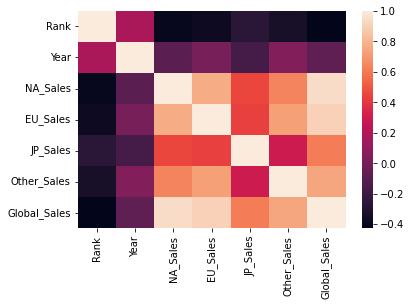

In [17]:
ax = sns.heatmap(df.corr())
print(df.corr())

In [22]:
import numpy as np
import random as rd
N = 500
x = []
y = []
for i in range (1,N):
    x.append(rd.randint(1,20))
    y.append(i+rd.randint(-10,0))
x = np.array(x)
y = np.array(y)

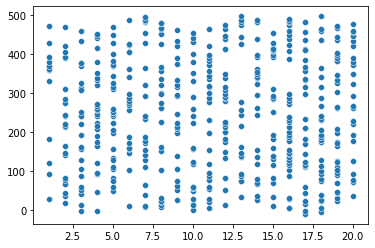

In [23]:
ax = sns.scatterplot(x=x, y=y)

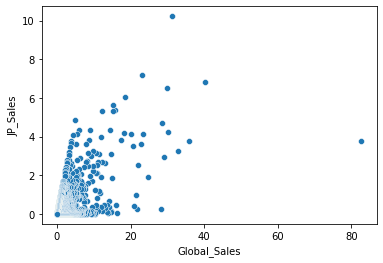

In [15]:
ax = sns.scatterplot(data=df,x="Global_Sales", y="JP_Sales")

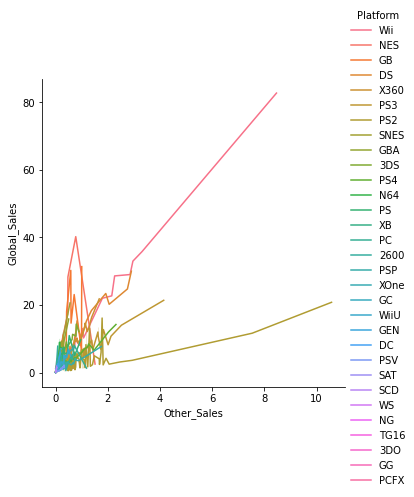

In [33]:
ax = sns.relplot(data=df,x='Other_Sales', y='Global_Sales',hue='Platform',kind="line")

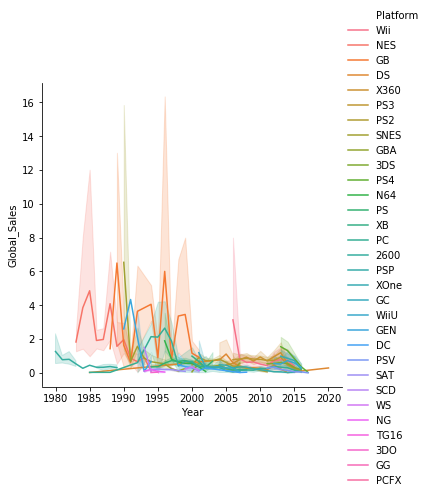

In [24]:
ax = sns.relplot(data=df,x='Year', y='Global_Sales',hue='Platform',kind="line")